In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [6]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "./Sign Language for Alphabets Khalid/Sign Language for Alphabets", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

"""train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/hp/anaconda_work/Sign Language for Alphabets Khalid/Sign Language for Alphabets", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)"""

Found 40500 files belonging to 27 classes.
Using 32400 files for training.


'train_data = tf.keras.preprocessing.image_dataset_from_directory(\n    "C:/Users/hp/anaconda_work/Sign Language for Alphabets Khalid/Sign Language for Alphabets", labels=\'inferred\', label_mode=\'int\', class_names=None,\n    color_mode=\'rgb\', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,\n    validation_split=0.2, subset="training"\n)'

In [7]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "./Sign Language for Alphabets Khalid/Sign Language for Alphabets", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)
"""val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/hp/anaconda_work/Sign Language for Alphabets Khalid/Sign Language for Alphabets", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)"""

Found 40500 files belonging to 27 classes.
Using 8100 files for validation.


'val_data = tf.keras.preprocessing.image_dataset_from_directory(\n    "C:/Users/hp/anaconda_work/Sign Language for Alphabets Khalid/Sign Language for Alphabets", labels=\'inferred\', label_mode=\'int\', class_names=None,\n    color_mode=\'rgb\', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,\n    validation_split=0.2, subset="validation"\n)'

In [8]:
#class names 
dict_labels = {0:"a",1:"b",2:"c",3:"d",4:"e",5:"f",6:"g",7:"h",8:"i",9:"j",10:"k",11:"l",12:"m",13:"n",14:"o",15:"p",16:"q",17:"r",18:"s",19:"t",20:"u",21:"unknown",22:"v",23:"w",24:"x",25:"y",26:"z"}

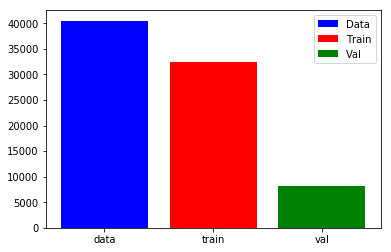

In [9]:
#visulaize data
fig, ax = plt.subplots()
ax.bar("data",40500 ,color= 'b', label='Data')
ax.bar("train",32400 ,color= 'r', label='Train')
ax.bar("val",8100 ,color='g', label='Val')
leg = ax.legend();

In [10]:
#build cnn 
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(50,50 ,3) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(27, activation = 'softmax'))


In [12]:
model.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [13]:
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [14]:
fit= model.fit(train_data,validation_data=val_data,epochs=25,callbacks=[call])

Epoch 1/25


2021-07-14 22:47:58.065869: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-07-14 22:47:58.087207: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2099940000 Hz


1013/1013 [==============================] - 225s 181ms/step - loss: 1.4372 - accuracy: 0.5967 - val_loss: 0.3094 - val_accuracy: 0.9114
Epoch 2/25
1013/1013 [==============================] - 198s 195ms/step - loss: 0.3017 - accuracy: 0.9083 - val_loss: 0.2180 - val_accuracy: 0.9347
Epoch 3/25
1013/1013 [==============================] - 176s 173ms/step - loss: 0.1773 - accuracy: 0.9448 - val_loss: 0.1816 - val_accuracy: 0.9504
Epoch 4/25
1013/1013 [==============================] - 170s 167ms/step - loss: 0.1254 - accuracy: 0.9596 - val_loss: 0.1517 - val_accuracy: 0.9601
Epoch 5/25
1013/1013 [==============================] - 146s 145ms/step - loss: 0.0987 - accuracy: 0.9693 - val_loss: 0.1577 - val_accuracy: 0.9612
Epoch 6/25
1013/1013 [==============================] - 172s 169ms/step - loss: 0.0842 - accuracy: 0.9731 - val_loss: 0.1332 - val_accuracy: 0.9669
Epoch 7/25
1013/1013 [==============================] - 142s 141ms/step - loss: 0.0690 - accuracy: 0.9783 - val_loss: 0.130

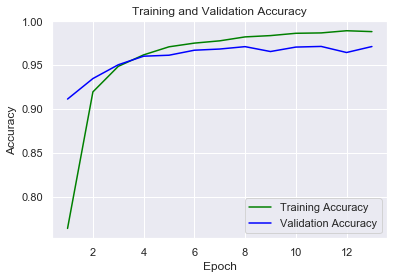

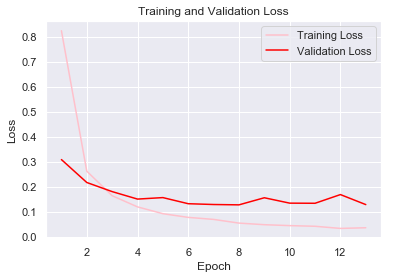

In [15]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
import joblib
joblib.dump(fit, 'khalid-sequential')

TypeError: can't pickle weakref objects